In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('pdfConvertFULL.csv', sep = '|')

In [7]:
df.head(10)

,Unnamed: 0,0,1
0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...
1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...
2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...
3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...
4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...
5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...
6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...
7,7,GSD 102 AL FA22 Intro to the Videogame Industr...,gsd 102 introduction to the video game industr...
8,8,IS 445 AO SP20 Info Books & Resources Youth (M...,is445 ao information books and resources for y...
9,9,GSD 390 DBU FA22 Introduction to Unreal (Baird...,gsd 390 – introduction to unreal general inf...


In [12]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
#from autocorrect import spell

data = []

for i in range(df.shape[0]):
    sms = df.iloc[i, 2]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append((stemmer.stem(word)))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer()
matrix.fit(data)

CountVectorizer()

In [38]:
max(matrix.vocabulary_)

'zzrhbfclz'

In [52]:
def seq_freq_index_encoder(reviews, count_vect=False):
    '''
    count_vect = False, if you are encoding on the training data
    count_vect = vectorizer of train data if encoding on cv or test data
    '''
    
    returnable = 2
    if count_vect==False:
        returnable = 3
        count_vect = CountVectorizer()
        count_vect.fit_transform(reviews)
        vectorizer = count_vect
    count_vect_xtrain = count_vect.transform(reviews)
    word_frequencies = count_vect_xtrain.sum(axis=0)
    word_count_list = [(word, count) for word, count in zip(count_vect.get_feature_names_out(), np.array(word_frequencies)[0])]
    word_freq_df = pd.DataFrame(sorted(word_count_list, key=lambda x: x[1], reverse=True), columns = ['word', 'frequency'])
    word_freq_df['freq_index'] = np.array(word_freq_df.index)+1
    print(word_freq_df.head())
    
    ax = sns.barplot(data=word_freq_df[:20], y='word', x='frequency')
    ax.set_title("top 20 words")
    plt.tight_layout()
    plt.show()
    
    vocab_dict = {}
    # creating top 5000 vocab_dict
    for row in word_freq_df[:5000].iterrows():
        vocab_dict[row[1]['word']] = [row[1]['frequency'], row[1]['freq_index']]
        
    
    train_reviews_list = []
    for review in reviews:
        review_list = []
        for word in review.lower().split():
            try:
                review_list.append(vocab_dict[word][1])
            except:
                pass
        train_reviews_list.append(np.array(review_list))
    if returnable == 3:
        return train_reviews_list, word_freq_df, vectorizer
    else:
        return train_reviews_list, word_freq_df

      word  frequency  freq_index
0      cid      48748           1
1  student      17361           2
2    cours      14310           3
3    class      14263           4
4   assign      13933           5


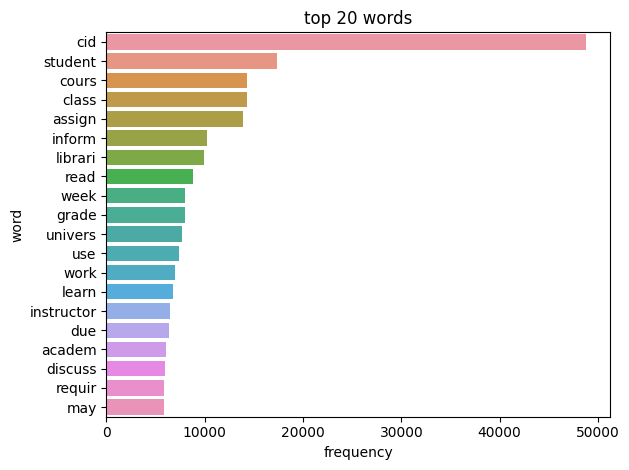

([array([ 248,   50, 2159, 2255,  287,  354,  586,  725,   50,  354,   83,
          586,   15,  731, 2549,    2,   14,  229,  367,   40,    3,    2,
          712,  742,   65,  133,    6,   85,   22,  388,   67,   65,  458,
          468, 4543,   73,   99, 1050,  283,  478,   80,  964,  404,  669,
          632, 2889,  320,   13,   55,  504,  257,   40, 2159,   39,   29,
          170,    6,   85,  138,    3,  217,    3,   68,  280,   14,  145,
          243,   54,  231, 2601,    6,   85,   54,  168,  243,  571,   50,
           11,   25,   14,  108, 1509,   54,   14,  145,   65,  723,  964,
           74,    6,  132,  179,  480,  277,   26,    6,   85,   21,   56,
           85,  141,   30,  131,  777,  126,  439,  373,  277,  194,  179,
          230,  605,  164,    6,   93,   50,  108,    3,   68,   59,  108,
          270,  161,  334,   75,    6,  418,   11,   25,  510,   14,  108,
            3,   68,   59,  108,  272,  464,  549,  320,  334,   24,  140,
           56,  264,  112

In [60]:
seq_freq_index_encoder(data)